# **K-Nearest Neighbours**
---
# Initializing Variables :

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/classification_train.csv",index_col = 0)
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/classification_test.csv")
print(df_train)

X = df_train.iloc[:,1:].values          # Given Labelled Data
label = df_train.iloc[:,0].values       

X_train = X[:,:]       # Splitting Data to find optimum value of K
X_test = X[1000:5000,:]
label_train = label[:]
label_test = label[1000:5000]

test_data = df_test.iloc[:,1:].values  # Test Data whose labels are to be found out 
ids = df_test.iloc[:,0].values         # Id of Test Data

print(X)

# Normalization

x = (X)/255
x_train = (X_train)/255



       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          8       0       0       0       0       0       0       0       0   
1          4       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          8       0       0       0       0       0       0       0       0   
4          2       0       0       0       0       1       0       3       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
29995      3       0       0       0       0       0       0       0       0   
29996      4       0       0       0       0       0       0       0       0   
29997      9       0       0       0       0       0       0       0       0   
29998      4       0       0       0       0       1       0       0       0   
29999      6       0       0       0       1       0       0       0       0   

       pixel9  ...  pixel775  pixel776 

# Analysing Data :

In [7]:
import cv2
from google.colab.patches import cv2_imshow

classes = pd.DataFrame([np.unique(df_train.label.values),np.bincount(df_train.label.values)],index = ['labels','Number of labels'])
print(classes)                                    # checking for all labels and bias in data  

for i in range(10):                               # checking top 10 samples from given labelled data 
    xi = df_train.iloc[i,1:].to_numpy()           
    xi = xi.reshape([28,28])
    img = np.uint8(xi)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2_imshow(img)                               # plotting grayscale images from given pixel values

                     0     1     2     3     4     5     6     7     8     9
labels               0     1     2     3     4     5     6     7     8     9
Number of labels  3000  3000  3000  3000  3000  3000  3000  3000  3000  3000


# Finding Optimum value of K by plotting loss and K :

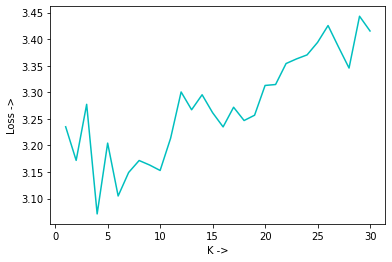

In [ ]:
losses , ks = [] , []
x_test = (X_test - np.mean(X,axis = 0, keepdims = True))/255            # labelled test data standardization
for k in range(1,int(x_train.shape[0]**0.5)):                           # checking upto square root of K 
    y_pred = knn(k,x_train,label_train,x_test)  
    loss = np.mean((label_test-y_pred)**2)   # mean square error loss
    ks.append(k)
    losses.append(loss)
plt.plot(ks,losses,c = 'c')
plt.xlabel('K ->')
plt.ylabel('Loss ->')

#plt.savefig("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/knn_loss_v_k.png")
plt.show()

# Optimum value of K is 4

# Implementing KNN

In [ ]:
test_data = df_test.iloc[:,1:].values                             # unlabelled test data
x_test = (test_data - np.mean(X,axis = 0, keepdims = True))/255   # standardisation

def dist(x,x_test):                                               # Euclidean Distance

    # calculating distance via (a-b)**2 = a**2 + b**2 - 2*a*b 

    a2 = x**2 
    b2 = x_test**2
    ab = 2 * x * x_test
    distance = np.sum(a2+b2-ab,axis = 1)

    return distance

def knn(k,x, label , x_test):
    row, col = x.shape
    y_pred = np.zeros(x_test.shape[0])

    for i in range(x_test.shape[0]):

        distance = np.array(dist(x,x_test[i]))                   # ndarray of distances of ith element of x_test from each element of x
        dist_sort = np.sort(distance)                            # sorting to find least k distances
        Nearest_k = dist_sort[:k]                                
        indices = np.array([],dtype = 'int32')

        for j in range(k):
            indices = np.hstack([indices,np.where(distance==dist_sort[j])[0]])       # finding indices of k least distances in x

        Nearest_label = label[indices]                                               # finding labels of k least distances 
        count = np.bincount(Nearest_label)                                           # puts stuff into bins whose index are values of Nearest_label  
        y_pred[i] = np.argmax(count)                                                 # most likely label

    return y_pred     
k = 4                                       # optimum value of k
y_pred = knn(k ,x,label,x_test)

print (y_pred)

# Saving Predictions into a csv file :

In [ ]:
y_pred = y_pred.astype("int32")                                                             # changing datatype from float 
res= pd.DataFrame([ids,y_pred[:10000]],index = ["Ids","Predicted label"],dtype= 'int32').T
res.to_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/KNN_Result.csv")
print(res)

        Ids  Predicted label
0     25672                0
1     59964                1
2     66230                2
3     50801                2
4     83307                3
...     ...              ...
9995  71009                0
9996  67472                6
9997  99226                8
9998  58519                8
9999  80458                2

[10000 rows x 2 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')